<a href="https://colab.research.google.com/github/MAANASA-KOTTE/GenAI/blob/main/Neural_Network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Implementing a Neural Network using python modules**

In [30]:
from tensorflow.keras.datasets import mnist

In [31]:
(x_train, y_train),(x_test,y_test)=mnist.load_data()

In [32]:
x_train=x_train/255
x_test=x_test/255

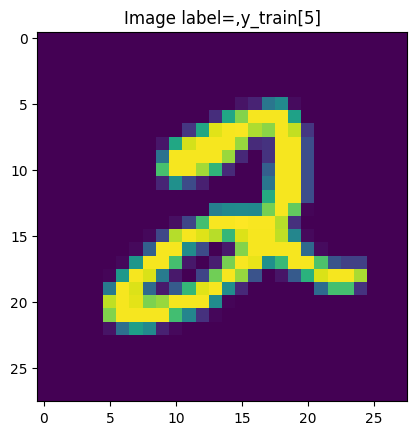

In [33]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])
plt.title(f'Image label=,y_train[5]')
plt.show()

In [34]:
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical

In [35]:
model=Sequential([
    Flatten(input_shape=(28,28)), #input layer= 784 nuerons
    Dense(128,activation='relu'), #hidden layer= 5 neurons
    Dense(10,activation='softmax') #output layer= 10 nuerons
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 101,770 (397.54 KB)

 Trainable params: 101,770 (397.54 KB)

 Non-trainable params: 0 (0.00 B)

In [38]:
model.compile(optimizer='adam',loss='categorical_crossentropy',metrics=['accuracy'])

# Compile says how the back propogation is gonna happen. HOw to identify the loss and reduce it.

In [37]:
y_train_categorical = to_categorical(y_train, num_classes=10)
y_test_categorical = to_categorical(y_test, num_classes=10)

In [39]:
# Train the model
model.fit(x_train, y_train_categorical, epochs=5, batch_size=32, verbose=2)

Epoch 1/5
1875/1875 - 8s - 4ms/step - accuracy: 0.9255 - loss: 0.2585
Epoch 2/5
1875/1875 - 6s - 3ms/step - accuracy: 0.9664 - loss: 0.1144
Epoch 3/5
1875/1875 - 7s - 4ms/step - accuracy: 0.9769 - loss: 0.0781
Epoch 4/5
1875/1875 - 5s - 3ms/step - accuracy: 0.9819 - loss: 0.0596
Epoch 5/5
1875/1875 - 10s - 6ms/step - accuracy: 0.9860 - loss: 0.0450


In [40]:
model.evaluate(x_test,y_test_categorical)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9697 - loss: 0.0948


[0.07971552759408951, 0.9742000102996826]

In [42]:
model.save('mnist.h5')

In [43]:
model.get_weights()

[array([[-0.01308946,  0.00501121,  0.01207168, ...,  0.06493989,
         -0.03768924, -0.07586589],
        [-0.07780678,  0.04249638, -0.01524866, ...,  0.03564142,
          0.06156532, -0.00014742],
        [ 0.01007117, -0.0720911 ,  0.04148864, ..., -0.05422278,
          0.01664859,  0.00909602],
        ...,
        [ 0.06752259,  0.07368577,  0.06190263, ..., -0.02556305,
          0.07743742, -0.07034788],
        [-0.04505077,  0.01152509,  0.06862781, ...,  0.05011041,
         -0.00685278, -0.01286469],
        [-0.02566898, -0.0271719 , -0.06533354, ...,  0.02163634,
          0.03580154, -0.06840417]], dtype=float32),
 array([ 0.0191769 ,  0.18956895,  0.02074302, -0.02420517, -0.02114359,
         0.05471792,  0.1003504 , -0.05389   , -0.11758858,  0.07962478,
        -0.00441136, -0.01419159,  0.05972051, -0.0269381 ,  0.04403534,
         0.05063039, -0.01589908,  0.08176269,  0.07136685,  0.09097122,
        -0.02451944,  0.1674    ,  0.01609475,  0.06141913, -0.102